# Project 2: Profiles of Profitable Apps

Objective: Analyze data from Google Play and Apples App Store to determine which types of free apps are most likely to attract a high volume of users. Make a recommendation for the best app categories to target with free apps utilizing an ad-based revenue model.

## Import Modules

In [1]:
from csv import reader
import matplotlib.pyplot as plt

## Import Data

The data for this analysis was provided in csv files. Define a function to read the data from csv files. Create an option to preview the headers and view the first two rows of data. Determine the number of rows and columns in each dataset.

In [2]:
# Define a function to read and preview data in csv files

def read_csv(file_name, preview=False):
    with open(file_name,'r') as opened_file:
        read_file = reader(opened_file)
        all_rows = list(read_file)
        header = all_rows[0]
        data = all_rows[1:]
        if preview:
            print("Headers:", header)
            print('\n')
            for row in data[:2]:
                print(row)
                print('\n')
            print('\n')
            print("Number of Rows: ", len(data))
            print('\n')
            print("Number of Columns: ", len(header))
        else:
            return all_rows

### Google Play Store

The dataset for the Google Play Store was obtained from [Kaggle](https://www.kaggle.com/datasets/lava18/google-play-store-apps). 

The dataset contains 13 fields, a brief definition for each field is included below:


1. 'App' : Application Name
1. 'Category' : Application Category
1. 'Rating' : Overall User Rating 
1. 'Reviews' : Number of User Reviews
1. 'Size' : Size of the App
1. 'Installs' : Number of User Downloads
1. 'Type' : Paid or Free
1. 'Price' : Price in USD
1. 'Content Rating' : Target Age Group
1. 'Genres' : Apps can be Classified in Multiple Genres
1. 'Last Updated' : Date of Last Update
1. 'Current Ver' : Name of Current Version
1. 'Android Ver' : Minimum Android Version Required 




 


In [3]:
# Preview the data from Google Play Store
read_csv('googleplaystore.csv',preview=True)
# Assign the dataset to the variable droid
droid = read_csv('googleplaystore.csv')
print('\n')

Headers: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']




Number of Rows:  10841


Number of Columns:  13




### Apple App Store

The dataset for the Apple App Store was also obtained from [Kaggle](https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps). 

The dataset contains 16 fields, a brief definition for each field is included below:

1. 'id' : App ID
1. 'track_name' : App Name
1. 'size_bytes' : Download Size in Bytes
1. 'currency' : Transaction Currency Used
1. 'price' : Purchase Price
1. 'rating_count_tot' : User Rating Counts (All Versions)
1. 'rating_count_ver' : User Rating Counts (Current Version)
1. 'user_rating' : Average User Rating (All Versions)
1. 'user_rating_ver' : Average User Rating (Current Version)
1. 'ver' : Latest Version Code
1. 'cont_rating' : Target Age Group
1. 'prime_genre' : Primary Genre
1. 'sup_devices.num' : Number of Devices Supported
1. 'ipadSc_urls.num' : Number of Screenshots Displayed
1. 'lang.num' : Number of Supported Languages
1. 'vpp_lic' : VPP Device based Licensing Enabled 


In [4]:
# Preview the data from the Apple App Store
read_csv('AppleStore.csv',preview=True)
# Assign the dataset to the variable ios
ios = read_csv('AppleStore.csv')
print('\n')

Headers: ['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']




Number of Rows:  7197


Number of Columns:  16




# Cleaning the Data 

* Determine which fields(columns) will be useful for the analysis. 

* Transform the data into the format which is most suitable.

* Remove duplicate entries and invalid records. 

### Selecting Useful Data

In the previous section, we imported the data and reviewed the structure of each dataset. Now, lets identify which columns will be useful for our analysis.

*As a reminder, we want to identify which types of free apps are most likely to attract alot of users.*

Although the datasets are not identical, we will include the most comparable fields.


The fields of interest are as follows:

| Field Description   | Google Dataset    | Apple Dataset  |
|---------------------|-------------------|--------------- |
| App Name            |App                |track_name      |
| Version             |Current Ver        |ver             |
| Category            |Category           |prime_genre     |
|Content Rating       |Content Rating     |cont_rating     |
|Number of Reviews    |Reviews            |rating_count_ver|
|Avg Rating           |Rating             |user_rating     |
|Number of Installs   |Installs           |rating_count_tot|
|Price in USD         |Price              |price           |
|Type                 |Type               |                |   


The dataset for the Apple Store does not include a field for the number of downloads or installs, so the 'rating_count_tot' (number of user ratings for all versions) will serve as a proxy. Similarily, we will use 'rating_count_ver' (number of user ratings for current version) as a proxy for Number of Reviews. The prices of all apps in both datasets are listed in USD.



#### Google Play Store

In [5]:
# Use list comprehension to extract the desired columns for android dataset
# Assign the new list to useful_droid

useful_droid = [[col[0],col[11],col[1],col[8],col[3],col[2],col[5],col[7],col[6]] for col in droid]

# Print the header and first row of data to verify the results

for row in useful_droid[:2]:
    print(row)
    print('\n')

['App', 'Current Ver', 'Category', 'Content Rating', 'Reviews', 'Rating', 'Installs', 'Price', 'Type']


['Photo Editor & Candy Camera & Grid & ScrapBook', '1.0.0', 'ART_AND_DESIGN', 'Everyone', '159', '4.1', '10,000+', '0', 'Free']




#### Apple App Store

In [6]:
# Use list comprehension to extract the desired columns for apple dataset
# Assign the new list to useful_ios

useful_ios = [[col[1],col[9],col[11],col[10],col[6],col[7],col[5],col[4]] for col in ios]

# Print the header and first row of data to verify the results

for row in useful_ios[:2]:
    print(row)
    print('\n')

['track_name', 'ver', 'prime_genre', 'cont_rating', 'rating_count_ver', 'user_rating', 'rating_count_tot', 'price']


['Facebook', '95.0', 'Social Networking', '4+', '212', '3.5', '2974676', '0.0']




### Transforming the Data

* The Apple Store dataset does not contain a column to categorize apps as 'Paid' or 'Free', but we can use the price column to create this field.

In [7]:
# Slice the header from the apple dataset
ios_header = useful_ios[0]

# Append the 'Type' column to the header row
ios_header.append('type')
print(ios_header)

['track_name', 'ver', 'prime_genre', 'cont_rating', 'rating_count_ver', 'user_rating', 'rating_count_tot', 'price', 'type']


In [8]:
# Slice the data from the apple dataset
ios_data = useful_ios[1:]
print(ios_data[:3])

[['Facebook', '95.0', 'Social Networking', '4+', '212', '3.5', '2974676', '0.0'], ['Instagram', '10.23', 'Photo & Video', '12+', '1289', '4.5', '2161558', '0.0'], ['Clash of Clans', '9.24.12', 'Games', '9+', '579', '4.5', '2130805', '0.0']]


In [9]:
# Loop over ios_data
# If the value of price is > 0, then append 'paid' to the new column
# Otherwise append 'free' to the new column

for row in ios_data:
    p = row[-1]
    if float(p)>0:
        row.append('paid')
    else:
        row.append('free') 

### Removing Paid Apps 

For this analysis, we must identify the categories where free apps are likely to attract a large number of users. Since we are only interested in free apps, we will remove all apps that are not categorized as free. Before we execute these changes, lets create a frequency table to examine the mix of 'free' vs. 'paid' apps.

#### Google Play Store

In [10]:
# Isolate the data and header rows in droid dataset
droid_header = useful_droid[:1]
print(droid_header)
droid_data = useful_droid[1:]

[['App', 'Current Ver', 'Category', 'Content Rating', 'Reviews', 'Rating', 'Installs', 'Price', 'Type']]


In [11]:
# Create a frequency table to compare paid vs. free apps in droid dataset
droid_frq_t = {}

for row in droid_data:
    type = row[-1]
    if type in droid_frq_t:
        droid_frq_t[type] += 1
    else:
        droid_frq_t[type] = 1

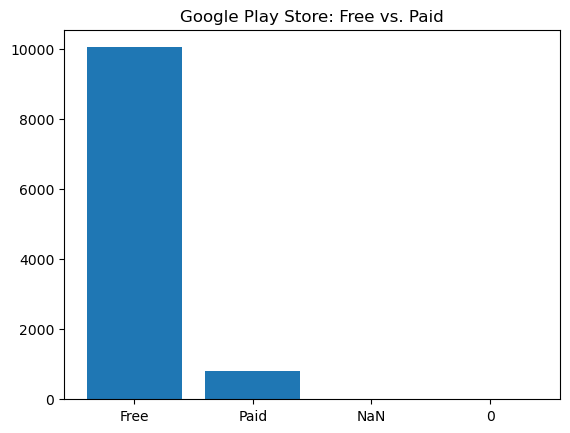

{'Free': 10039, 'Paid': 800, 'NaN': 1, '0': 1}


In [12]:
# Create a bar chart to examine the mix of free vs. paid apps
plt.bar(droid_frq_t.keys(),droid_frq_t.values())
plt.title("Google Play Store: Free vs. Paid")
plt.show()
print(droid_frq_t)

The previous chart illustrates a majority of the apps in Google Play Store are free. It also indicates two records in our sample data likely contain errors.

In [13]:
# Examine records that are not categorized as 'Free' or 'Paid'

not_a_num = [row for row in droid_data if row[-1]=='NaN']
zero = [row for row in droid_data if row[-1]=='0']
print(droid_header)
print('\n')
print(not_a_num)
print('\n')
print(zero)

# Rows that contain 'NaN and '0' contain erroneous data

[['App', 'Current Ver', 'Category', 'Content Rating', 'Reviews', 'Rating', 'Installs', 'Price', 'Type']]


[['Command & Conquer: Rivals', 'Varies with device', 'FAMILY', 'Everyone 10+', '0', 'NaN', '0', '0', 'NaN']]


[['Life Made WI-Fi Touchscreen Photo Frame', '4.0 and up', '1.9', '', '3.0M', '19', 'Free', 'Everyone', '0']]


In [14]:
# Use list comprehension to select free android apps, assign to free_droid

free_droid = [row for row in droid_data if row[-1]=='Free']

#### Apple App Store

In [15]:
# Create a frequency table to compare paid vs. free apps in apple dataset

ios_frq_cur = {}

for row in ios_data:
    type = row[-1]
    if type in ios_frq_cur:
        ios_frq_cur[type] += 1
    else:
        ios_frq_cur[type] = 1

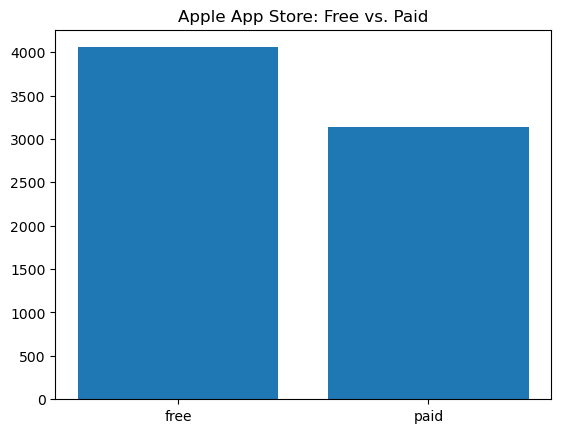

{'free': 4056, 'paid': 3141}


In [16]:
# Generate a frequency table

plt.bar(ios_frq_cur.keys(),ios_frq_cur.values())
plt.title("Apple App Store: Free vs. Paid")
plt.show()
print(ios_frq_cur)

The chart above illustrates the mix of free vs. paid apps is more balanced in the Apple App Store. By eliminating paid apps from our dataset, we are significantly reducing our sample size.

In [17]:
# Use list comprehension to isolate the free apps 

free_ios = [row for row in ios_data if row[-1]=='free']

### Removing Duplicates


#### Google Play Store

In [18]:
# Loop through the rows in free_droid and count the number of duplicates

unique_droid_apps = []
duplicate_droid_apps = []

for app in free_droid:
    name = app[0]
    if name in unique_droid_apps:
        duplicate_droid_apps.append(name)
    else:
        unique_droid_apps.append(name)

print(f'Number of Duplicate Droid Apps: {len(duplicate_droid_apps)}')


Number of Duplicate Droid Apps: 1135


In [19]:
# Initialize an empty dictionry
# Loop over the free_droid list, populate the dictionary with the max number of reviews for each app

max_reviews = {}

for app in free_droid:
    name = app[0]
    num_reviews = float(app[4])
    
    if name in max_reviews and max_reviews[name] < num_reviews:
        max_reviews[name] = num_reviews
        
    elif name not in max_reviews:
        max_reviews[name] = num_reviews

In [20]:
# Use the dictionary to filter out duplicate Android apps with max reviews and append to droid_clean list

droid_clean = []
droid_dupl = []

for app in free_droid:
    name = app[0]
    n_reviews = float(app[4])
    
    if (max_reviews[name] == n_reviews) and (name not in droid_dupl):
        droid_clean.append(app)
        droid_dupl.append(name) 

In [21]:
print(droid_clean[:2])

[['Photo Editor & Candy Camera & Grid & ScrapBook', '1.0.0', 'ART_AND_DESIGN', 'Everyone', '159', '4.1', '10,000+', '0', 'Free'], ['U Launcher Lite – FREE Live Cool Themes, Hide Apps', '1.2.4', 'ART_AND_DESIGN', 'Everyone', '87510', '4.7', '5,000,000+', '0', 'Free']]


#### Apple App Store

In [22]:
# Loop through the rows in free_ios and count the number of duplicates

unique_ios_apps = []
duplicate_ios_apps = []

for app in free_ios:
    name = app[0]
    if name in unique_ios_apps:
        duplicate_ios_apps.append(name)
    else:
        unique_ios_apps.append(name)

print(f'Number of Duplicate iOS Apps: {len(duplicate_ios_apps)}')        


Number of Duplicate iOS Apps: 2


In [23]:
# Initialize an empty dictionry
# Loop over the free_ios list, populate the dictionary with the max number of reviews for each app

max_reviews = {}

for app in free_ios:
    name = app[0]
    num_reviews = float(app[4])
    
    if name in max_reviews and max_reviews[name] < num_reviews:
        max_reviews[name] = num_reviews
        
    elif name not in max_reviews:
        max_reviews[name] = num_reviews

In [24]:
# Use the dictionary to filter out duplicate ios apps with max reviews and append to ios_clean list

ios_clean = []
ios_dupl = []

for app in free_ios:
    name = app[0]
    n_reviews = float(app[4])
    
    if (max_reviews[name] == n_reviews) and (name not in ios_dupl):
        ios_clean.append(app)
        ios_dupl.append(name) 

In [27]:
print(ios_clean[:2])

[['Facebook', '95.0', 'Social Networking', '4+', '212', '3.5', '2974676', '0.0', 'free'], ['Instagram', '10.23', 'Photo & Video', '12+', '1289', '4.5', '2161558', '0.0', 'free']]


### Removing Foreign Apps

Our analysis is directed towards apps for users in the United States, so we can safety eliminate foreign apps from our analysis.


In [25]:
print(free_droid[:3])

[['Photo Editor & Candy Camera & Grid & ScrapBook', '1.0.0', 'ART_AND_DESIGN', 'Everyone', '159', '4.1', '10,000+', '0', 'Free'], ['Coloring book moana', '2.0.0', 'ART_AND_DESIGN', 'Everyone', '967', '3.9', '500,000+', '0', 'Free'], ['U Launcher Lite – FREE Live Cool Themes, Hide Apps', '1.2.4', 'ART_AND_DESIGN', 'Everyone', '87510', '4.7', '5,000,000+', '0', 'Free']]


In [26]:
print(free_ios[:3])

[['Facebook', '95.0', 'Social Networking', '4+', '212', '3.5', '2974676', '0.0', 'free'], ['Instagram', '10.23', 'Photo & Video', '12+', '1289', '4.5', '2161558', '0.0', 'free'], ['Clash of Clans', '9.24.12', 'Games', '9+', '579', '4.5', '2130805', '0.0', 'free']]
